## Annotated Scatterplot with Categorical Zoom Facets


This data visualization tutorial tackles a common pair of data visualization objectives: _1)_ showing how data between categories relate and _2)_ showing how data within each category are structured.

To this end, we'll build a visualization for the demographics of the most wealthy members of different industries.
Data for this exercise comes from [Joy Shill via Kaggle](https://www.kaggle.com/datasets/joyshil0599/exploring-wealth-forbes-richest-people-dataset).

In our visualization, we will look at how the demographics of the upper echelons of different industries are structured and how that structure compares between industries.
Scatterploting age versus wealth faceted per industry will provide a good view of individual industries' top-tier compositions.
To aid comparison of demographics between industries, we'll provide a summary plot and structure our industry-specific facets zoomed outsets of the summary plot.
We'll arrange the main plot and the zoom outsets together as an axes grid.

To take on this latter task --- composing a primary axes with a faceted grid of zoomed views --- we'll make use of `outset` library, which provides convenient tools to this end.

Here's a sneak peek at the visualization we'll be building:

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/80d2c1281cac1e0152c056048645f897fcc9e83a/static/graph/web-scatterplot-with-categorical-zoom-facets.png)


## Setup


Begin by importing necessary packages.

Notably:

- `adjustText` for nudging scatterplot text labels to prevent overlap
- `matplotlib` as the graphics engine
- `outset` for managing multi-zoom grid and zoom indicators
- `pandas` for data management


In [1]:
import typing

from adjustText import adjust_text
import outset as otst
from outset import patched as otst_patched
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use("bmh")  # aesthetics: switch matplotlib style sheet

To install dependencies for this exercise,

```bash
python3 -m pip install adjustText matplotlib numpy outset opytional pandas
```


## Data Preparation

Next, let's fetch our data and do a little work on it.
We'll need to clean up the "Net Worth" column, which is polluted with dollar signs and textual "billion" qualifiers.
We'll also shorten the names of the people in our dataset so they're easier to plot and rank everyone within their own industry in order to isolate the upper echelons of each industry.


In [2]:
df = pd.read_csv("https://osf.io/bvrjm/download")  # download data
df["Net Worth (Billion USD)"] = (
    # strip out pesky non-numeric characters then convert to float
    df["Net Worth"]
    .str.replace(r"[^.0-9]+", "", regex=True)
    .astype(float)
)
df["Who"] = (  # shorten names so they're easier to plot...
    df["Name"]
    .str.replace(r"\s*&.*", "", regex=True)  # ... remove "& family"
    .replace(r"(\b[A-Za-z])\w+\s+", r"\1. ", regex=True)  # abbrev F. Lastname
    .str.slice(0, 12)  # chop long names to 12 characters
)

# rank everyone by wealth within their industry
df["Industry Rank"] = df.groupby("Industry")["Net Worth (Billion USD)"].rank(
    method="dense", ascending=False
)

For tractability, we will visualize only a subset of industry categories.
Here's a few with interesting contrast in demographic structure.


In [3]:
focal_industries = [
    "Technology",
    "Fashion & Retail",
    "Sports",
    "Finance & Investments",
    "Automotive",
]

## Create Axes Grid

Now it's time to get started plotting.
We can use an the outset library's `OutsetGrid` class to manage content and layout of our faceted axes grid.
This tool operates analogously to seaborn's [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), if you're familiar with that.

We pass `OutsetGrid` a data frame containing our data, the names of the columns we want to use for the x and y axes, and the names of the columns we want to use to split our data into facets.
Passing the `hue` kwarg will supplement faceting with color-coding by industry.
Other kwargs provide styling and layout information, including how we want plots to be shaped and how many columns we want to have.


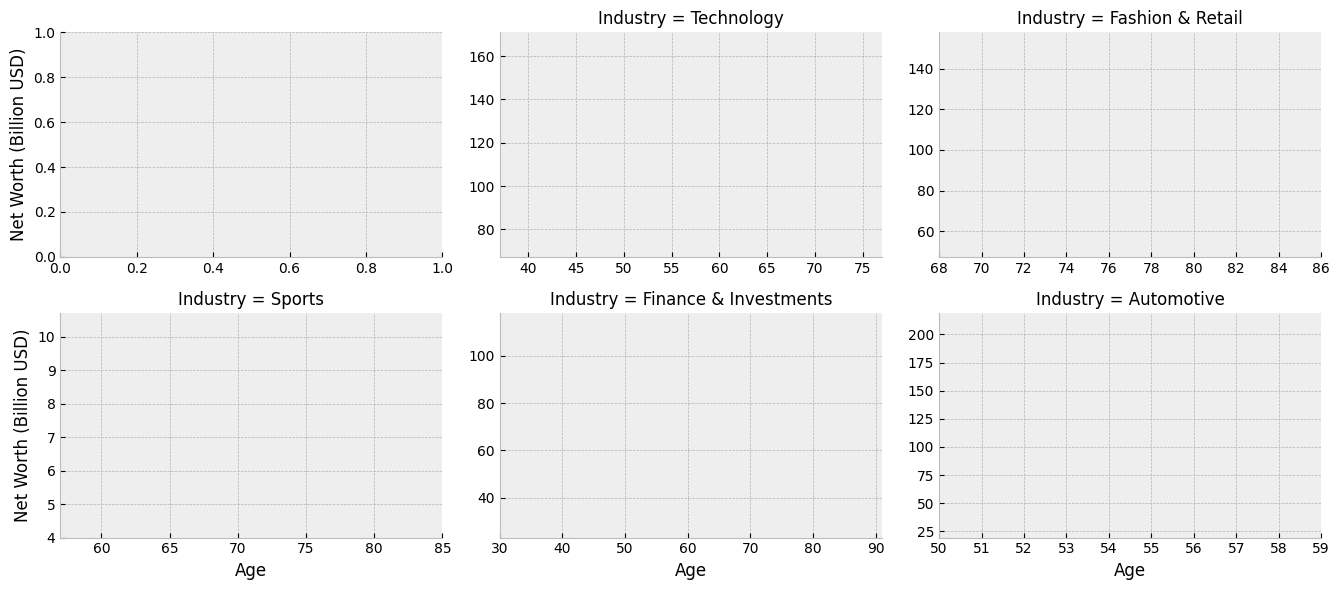

In [4]:
grid = otst.OutsetGrid(  # set up axes grid manager
    df[(df["Industry Rank"] < 8)].dropna(),  # only top 8 in each industry
    x="Age",
    y="Net Worth (Billion USD)",
    col="Industry",
    hue="Industry",
    col_order=focal_industries,  # subset to our focal industries
    hue_order=focal_industries,
    aspect=1.5,  # widen subplots
    col_wrap=3,
)

plt.show()  # show the grid of subplots

## Set Up Plot Content


Next, we'll scatterplot our billionaire's ages and wealths.
We need to add each billionaire to the main plot and to their industry's outset plot.

We'll use a patched version of seaborn's `scatterplot` function bundled with `outset` due to an [open seaborn issue](https://github.com/mwaskom/seaborn/issues/3601).
We will use `OutsetGrid.map_dataframe` to plot appropriate data and colors on each axes.
The `map_dataframe` method works analogously it its equivalent on seaborn's `FacetGrid.
The first argument provides a plotter function, which is called with subsequent arguments forwarded on each axes.


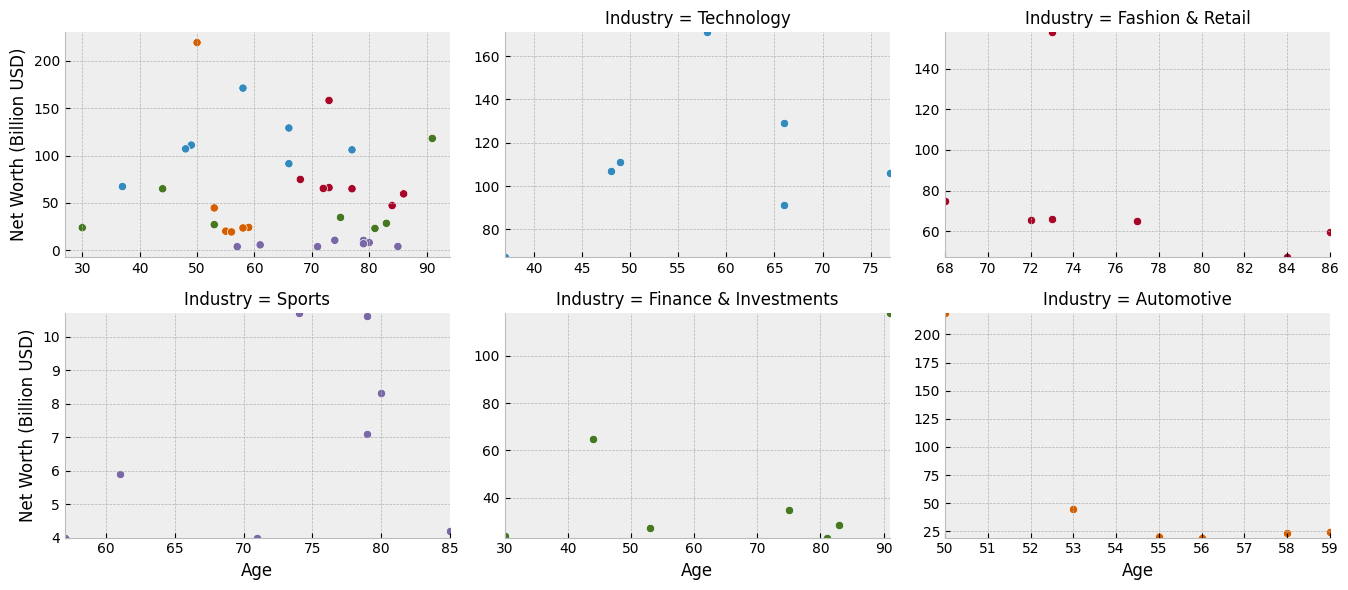

In [5]:
grid = otst.OutsetGrid(  # set up axes grid manager
    df[(df["Industry Rank"] < 8)].dropna(),  # only top 8 in each industry
    x="Age",
    y="Net Worth (Billion USD)",
    col="Industry",
    hue="Industry",
    col_order=focal_industries,  # subset to our focal industries
    hue_order=focal_industries,
    aspect=1.5,  # widen subplots
    col_wrap=3,
)

grid.map_dataframe(  # map scatterplot over all axes
    otst_patched.scatterplot,
    x="Age",
    y="Net Worth (Billion USD)",
    legend=False,
)

plt.show()  # show the grid of subplots

## Add Zoom Indicators


Now it's time to add zoom indicator boxes, a.k.a. `outset` "marquees," to show how the scales of our auxiliary plots relate to the scale of the main plot.
Note that we pass the `equalize_aspect` kwarg so that aspect ratios can vary between the main plot and outset plots.
That way, zoom areas will expand to take full advantage of available space.


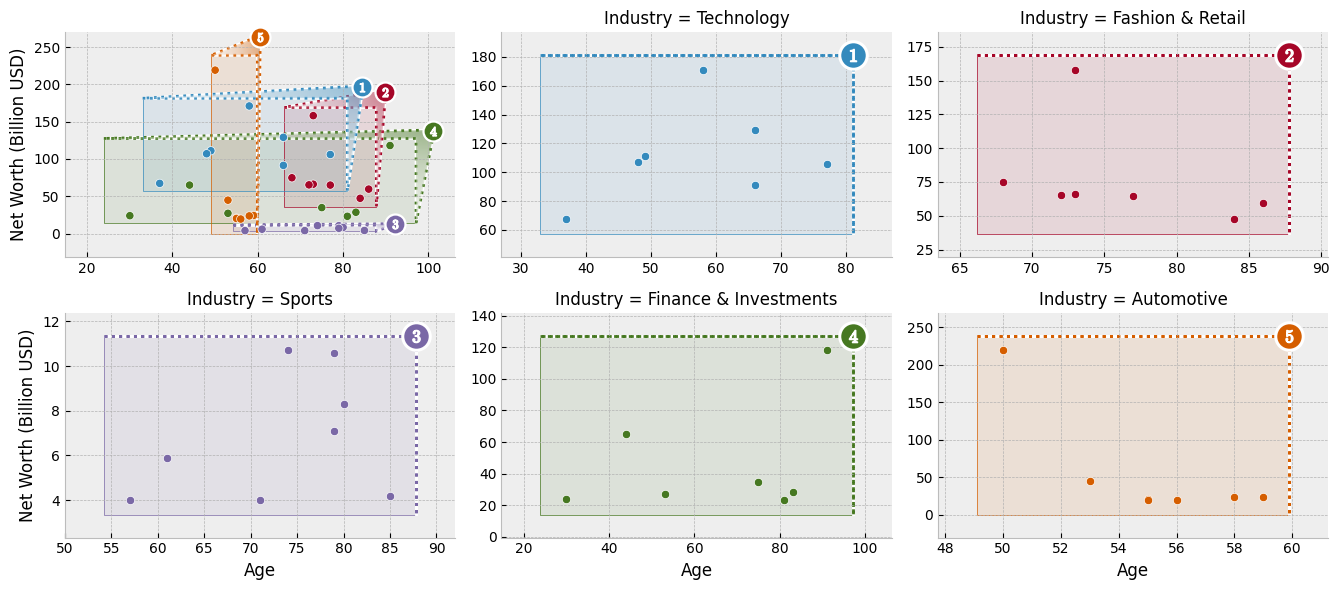

In [6]:
grid = otst.OutsetGrid(  # set up axes grid manager
    df[(df["Industry Rank"] < 8)].dropna(),  # only top 8 in each industry
    x="Age",
    y="Net Worth (Billion USD)",
    col="Industry",
    hue="Industry",
    col_order=focal_industries,  # subset to our focal industries
    hue_order=focal_industries,
    aspect=1.5,  # widen subplots
    col_wrap=3,
)

grid.map_dataframe(  # map scatterplot over all axes
    otst_patched.scatterplot,
    x="Age",
    y="Net Worth (Billion USD)",
    legend=False,
)

# draw "marquee' zoom indicators showing correspondences between main plot
# and outset plots
grid.marqueeplot(equalize_aspect=False)  # allow axes aspect ratios to vary

plt.show()  # show the grid of subplots

## Going Further

You can read more about scatter plot in the [dedicated section](/scatter-plot) of the gallery.

You can learn more about the `outset` package in the [official documentation](https://mmore500.com/outset/)

## Authorship

This tutorial is contributed by [Matthew Andres Moreno](https://mmore500.com/), the `outset` library author. You can find him on Twitter as [@MorenoMatthewA](https://twitter.com/morenomatthewa) and on GitHub as [@mmore500](https://github.com/mmore500/).
